In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import mne

In [14]:
# folder = 'D:\CHB_MIT'
folder = r'E:\New folder\chb24'
file_path = [os.path.join(folder,i ) for i in os.listdir(folder)]

In [15]:
print(file_path)

['E:\\New folder\\chb24\\chb24', 'E:\\New folder\\chb24\\chb24-summary.txt', 'E:\\New folder\\chb24\\chb24_01.edf', 'E:\\New folder\\chb24\\chb24_01.edf.seizures', 'E:\\New folder\\chb24\\chb24_02.edf', 'E:\\New folder\\chb24\\chb24_03.edf', 'E:\\New folder\\chb24\\chb24_03.edf.seizures', 'E:\\New folder\\chb24\\chb24_04.edf', 'E:\\New folder\\chb24\\chb24_04.edf.seizures', 'E:\\New folder\\chb24\\chb24_05.edf', 'E:\\New folder\\chb24\\chb24_06.edf', 'E:\\New folder\\chb24\\chb24_06.edf.seizures', 'E:\\New folder\\chb24\\chb24_07.edf', 'E:\\New folder\\chb24\\chb24_07.edf.seizures', 'E:\\New folder\\chb24\\chb24_08.edf', 'E:\\New folder\\chb24\\chb24_09.edf', 'E:\\New folder\\chb24\\chb24_09.edf.seizures', 'E:\\New folder\\chb24\\chb24_10.edf', 'E:\\New folder\\chb24\\chb24_11.edf', 'E:\\New folder\\chb24\\chb24_11.edf.seizures', 'E:\\New folder\\chb24\\chb24_12.edf', 'E:\\New folder\\chb24\\chb24_13.edf', 'E:\\New folder\\chb24\\chb24_13.edf.seizures', 'E:\\New folder\\chb24\\chb24_14

In [16]:
os.listdir(file_path[0])

['ictal', 'interictal', 'postictal', 'preictal']

In [17]:
import os
import mne

folder = r'E:\New folder\chb24'
subfolders = [os.path.join(folder, name) for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

# Dictionary to store loaded data
data_dict = {}

for subfolder in subfolders:
    for state_folder in os.listdir(subfolder):
        full_state_path = os.path.join(subfolder, state_folder)
        fif_files = [f for f in os.listdir(full_state_path) if f.endswith('.fif')]
        for fif_file in fif_files:
            file_path = os.path.join(full_state_path, fif_file)
            raw = mne.io.read_raw_fif(file_path, preload=True)
            data_dict[(subfolder, state_folder, fif_file)] = raw


Opening raw data file E:\New folder\chb24\chb24\ictal\chb24_01.edf_ictal_1_raw.fif...
Isotrak not found
    Range : 122880 ... 129280 =    480.000 ...   505.000 secs
Ready.
Reading 0 ... 6400  =      0.000 ...    25.000 secs...
Opening raw data file E:\New folder\chb24\chb24\ictal\chb24_01.edf_ictal_2_raw.fif...
Isotrak not found
    Range : 627456 ... 633856 =   2451.000 ...  2476.000 secs
Ready.
Reading 0 ... 6400  =      0.000 ...    25.000 secs...
Opening raw data file E:\New folder\chb24\chb24\ictal\chb24_03.edf_ictal_1_raw.fif...
Isotrak not found
    Range : 59136 ... 66560 =    231.000 ...   260.000 secs
Ready.
Reading 0 ... 7424  =      0.000 ...    29.000 secs...
Opening raw data file E:\New folder\chb24\chb24\ictal\chb24_03.edf_ictal_2_raw.fif...
Isotrak not found
    Range : 738048 ... 744448 =   2883.000 ...  2908.000 secs
Ready.
Reading 0 ... 6400  =      0.000 ...    25.000 secs...
Opening raw data file E:\New folder\chb24\chb24\ictal\chb24_04.edf_ictal_1_raw.fif...
Isot

In [28]:
import numpy as np
import mne

X = []
Y = []

for (subject, state, file_name), raw in data_dict.items():
    print(subject, state, file_name)
    if raw.times[-1] < 10.0:
        print("Warning: Data length is shorter than the epoch duration.")

    sfreq = raw.info['sfreq']

    if state == 'ictal':
        overlap = 0.99  # 95% overlap
        label = 1
    elif state == 'preictal':
        overlap = 0.5  # 50% overlap
        label = 2
    else:  # interictal, postictal
        overlap = 0.0  # No overlap
        label = 0 if state == 'interictal' else 3
    
    # Create fixed-length epochs
    epochs = mne.make_fixed_length_epochs(raw, duration=10.0, preload=True, overlap=overlap * 10.0)
    
    # Get data and labels
    X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
    Y_epochs = np.full(X_epochs.shape[0], label)  # Assign the label to each epoch
    print(label)
    
    X.append(X_epochs)
    Y.append(Y_epochs)

# Combine all data and labels into single arrays using vstack and hstack
X = np.vstack(X)
Y = np.hstack(Y)

print("Final shapes:", X.shape, Y.shape)


E:\New folder\chb24\chb24 ictal chb24_01.edf_ictal_1_raw.fif
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 151 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_01.edf_ictal_2_raw.fif
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 151 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_03.edf_ictal_1_raw.fif
Not setting metadata
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_03.edf_ictal_2_raw.fif
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 151 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_04.edf_ictal_1_raw.fif
Not setting metadata
221 matching events found
No baseline correction applied
0 projection items activated


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


Using data from preloaded Raw for 221 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_04.edf_ictal_2_raw.fif
Not setting metadata
171 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 171 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_04.edf_ictal_3_raw.fif
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_06.edf_ictal_1_raw.fif
Not setting metadata
141 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 141 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_07.edf_ictal_1_raw.fif
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 121 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_09.edf_ictal_1_raw.fif
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_11.edf_ictal_1_raw.fif
Not setting metadata


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


601 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 601 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_13.edf_ictal_1_raw.fif
Not setting metadata
61 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 61 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_14.edf_ictal_1_raw.fif
Not setting metadata
171 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 171 events and 2560 original time points ...
0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_15.edf_ictal_1_raw.fif
Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 71 events and 2560 original time points ...
0 bad epochs dropped


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


1
E:\New folder\chb24\chb24 ictal chb24_17.edf_ictal_1_raw.fif
Not setting metadata
561 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 561 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
1
E:\New folder\chb24\chb24 ictal chb24_21.edf_ictal_1_raw.fif
Not setting metadata
581 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 581 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
1
E:\New folder\chb24\chb24 interictal chb24_02_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_05_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_07.edf_interictal_1_raw.fif
Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 114 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_08_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_10_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_12_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_16_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_18_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_19_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_20_normal_raw.fif
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 360 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 interictal chb24_22_normal_raw.fif
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 106 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
0
E:\New folder\chb24\chb24 postictal chb24_01.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_01.edf_postictal_2_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_03.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_03.edf_postictal_2_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_04.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_06.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_07.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_09.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_13.edf_postictal_1_raw.fif
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 2560 original time points ...
0 bad epochs dropped


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


3
E:\New folder\chb24\chb24 postictal chb24_14.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_15.edf_postictal_1_raw.fif
Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 2560 original time points ...
0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_17.edf_postictal_1_raw.fif
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 2560 original time points ...
0 bad epochs dropped
3
E:\New folder\chb24\chb24 postictal chb24_21.edf_postictal_1_raw.fif
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
3
E:\New folder\chb24\chb24 preictal chb24_01.edf_preictal_1_raw.fif
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_03.edf_preictal_1_raw.fif
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_03.edf_preictal_2_raw.fif
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 2560 original time points ...
0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_04.edf_preictal_1_raw.fif
Not setting metadata
216 matching events found
No baseline correction applied


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 projection items activated
Using data from preloaded Raw for 216 events and 2560 original time points ...
0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_06.edf_preictal_1_raw.fif
Not setting metadata
244 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 244 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_07.edf_preictal_1_raw.fif
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 2560 original time points ...
0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_09.edf_preictal_1_raw.fif
Not setting metadata
348 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 348 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)
C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_11.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_13.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_14.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_15.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_17.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2
E:\New folder\chb24\chb24 preictal chb24_21.edf_preictal_1_raw.fif
Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 2560 original time points ...


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


0 bad epochs dropped
2


C:\Users\pc\AppData\Local\Temp\ipykernel_11044\1439277624.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data()  # (n_epochs, n_channels, n_times)


Final shapes: (10770, 21, 2560) (10770,)


In [29]:
pd.DataFrame(Y).value_counts()
# # Y

0
1    3526
0    3460
2    3151
3     633
Name: count, dtype: int64

In [30]:
X.shape

(10770, 21, 2560)

In [40]:
X = np.moveaxis(X,1,2)
X.shape

(10770, 2560, 21)

In [43]:
# mask = (Y == 0) | (Y == 2)
# mask

array([False, False, False, ...,  True,  True,  True])

In [42]:
pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 0.2/385.2 MB 2.1 MB/s eta 0:03:04
   ---------------------------------------- 0

Class distribution after filtering:
0    3460
1    3151
Name: count, dtype: int64
Training samples: 5288
Testing samples: 1323
Data scaling completed.
Class weights: {0: 0.9552023121387283, 1: 1.0492063492063493}


C:\Users\pc\mne-python\1.7.1_0\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2511, 32)            │          33,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2511, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 627, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 627, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 603, 64)             │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 603, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 150, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 141, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 141, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 70, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 70, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,294,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,462,113 (9.39 MB)

 Trainable params: 2,461,665 (9.39 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 92s 985ms/step - accuracy: 0.5861 - auc: 0.6019 - loss: 1.1317 - val_accuracy: 0.5064 - val_auc: 0.4731 - val_loss: 1.6828
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 963ms/step - accuracy: 0.7022 - auc: 0.7629 - loss: 0.5668 - val_accuracy: 0.6039 - val_auc: 0.6764 - val_loss: 1.1470
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7395 - auc: 0.8072 - loss: 0.5147 - val_accuracy: 0.6720 - val_auc: 0.7649 - val_loss: 1.1453
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 983ms/step - accuracy: 0.7654 - auc: 0.8474 - loss: 0.4736 - val_accuracy: 0.7067 - val_auc: 0.7880 - val_loss: 0.7952
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8020 - auc: 0.8801 - loss: 0.4190 - val_accuracy: 0.7354 - val_auc: 0.8053 - val_loss: 0.7419
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8224 - auc: 0.9083 - loss: 0.3754 - val_accuracy: 0.7430 - val_auc: 0.8262 - val_loss: 0.8882
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━

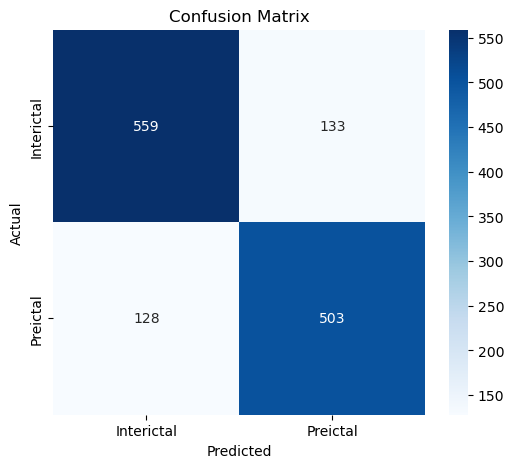

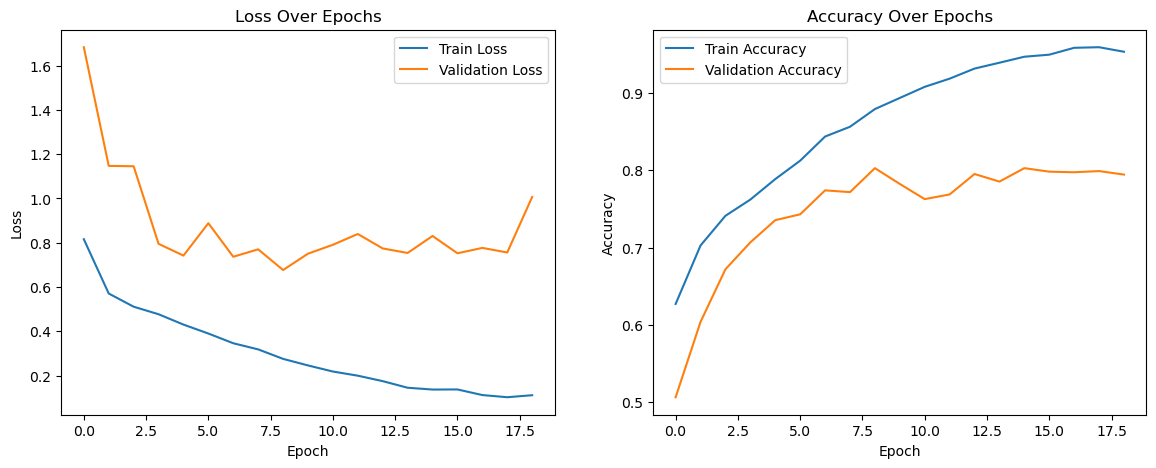

In [44]:
import os
import numpy as np
import pandas as pd
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assuming X and Y are already defined and preprocessed up to X.shape = (10770, 2560, 21)

# 1. Data Preparation
# a. Filter for interictal (0) and preictal (2)
mask = (Y == 0) | (Y == 2)
X_filtered = X[mask]
Y_filtered = Y[mask]
Y_filtered = np.where(Y_filtered == 0, 0, 1)  # Relabel

print("Class distribution after filtering:")
print(pd.Series(Y_filtered).value_counts())

# b. Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_filtered, Y_filtered, test_size=0.2, random_state=42, stratify=Y_filtered
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# c. Scale the data
n_channels = X_train.shape[2]
scalers = [StandardScaler() for _ in range(n_channels)]

for ch in range(n_channels):
    X_train[:, :, ch] = scalers[ch].fit_transform(X_train[:, :, ch])
    X_test[:, :, ch] = scalers[ch].transform(X_test[:, :, ch])

print("Data scaling completed.")

# 2. Handling Class Imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train),
    y=Y_train
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights_dict)

# 3. Building the Model
input_shape = X_train.shape[1:]  # (2560, 21)
num_classes = 1  # Binary classification

model = Sequential([
    Conv1D(filters=32, kernel_size=50, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=25, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=10, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

# 4. Training the Model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, Y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

# 5. Evaluating the Model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Y_pred_prob = model.predict(X_test).ravel()
Y_pred = (Y_pred_prob >= 0.5).astype(int)

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Interictal', 'Preictal']))

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Interictal', 'Preictal'],
            yticklabels=['Interictal', 'Preictal'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(14,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()
